## Exploring the Canadian Data Job Market project overview:

This project focuses on uncovering key insights into the Canadian job market for data professionals, particularly Data Analysts, Business Analysts, and Insights Analysts. The primary objective is to highlight the process of data cleaning and manipulation using Python, with targeted insights including:

1.	Industries hiring the most Data Analysts
2.	Common skills required for these roles
3.	Base salary expectations by experience level
4.	Company size and hiring trends
5.	The importance of degrees in the hiring process
6.	Work environment and job types
7.	Top hiring locations across Canada

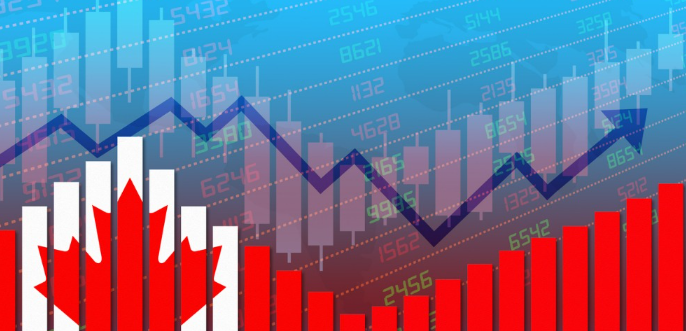

## Executive Summary with Tableau Dashboard 

You can access the Tableau Dashboard Insghts here https://public.tableau.com/app/profile/h.ki.t/viz/2024CanadianDataanalystjobMarket/1_Map#1

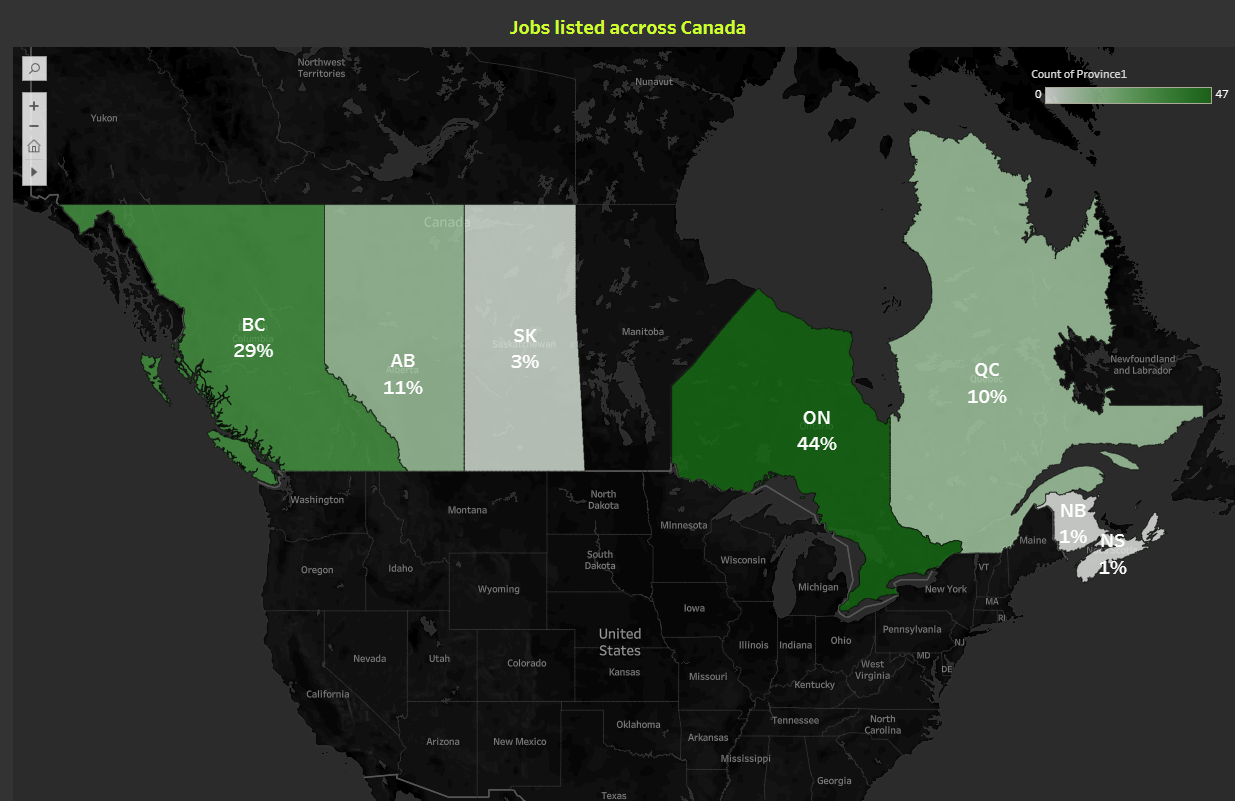

## Analysis Details

In [1]:
#import necessary libraries 
import pandas as pd 
import numpy as np

#Data visuliazation 
import seaborn as sns  
import matplotlib.pyplot as plt 

#import regular expression to deal with strings 
import re
#Import data formatting libraries 
from pandas import Series, DataFrame

c:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Load the datset 
df_original = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Portfolio\Python_Data_analytics\Data Job Market Canada\Datasets\Data_Jobs_raw.csv", encoding='ISO-8859-1')

#Display max column display to 20
pd.set_option('display.max.columns', 20)
pd.set_option('display.max.rows', 70)

### 1. Data exploration

In [3]:
#View data
df_original.head(3)

,Job Title,Company Name,URL,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type
0,Data and Evaluation Analyst,BC Lung Foundation,https://www.linkedin.com/jobs/search/?currentJ...,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Problem Solving · R (Progr...,Hospitals and Health Care 11-50 employees 26 o...,Hybrid,Full-time
1,"Analyst I, Growth Analytics",Affirm,https://www.linkedin.com/jobs/search/?currentJ...,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",NaN,1-3 years,Analytical Skills · Dashboards · SQL · Analyti...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time
2,Data Analyst / Engineer,Data SEA Consulting,https://www.linkedin.com/jobs/search/?currentJ...,NaN,"Toronto, ON",11-50 employees,NaN,3,Analytical Skills · Problem Solving · Python (...,"Technology, Information and Internet 11-50 emp...",On-site,Full-time


In [4]:
#See data total rows and columns 
df_original.shape

(110, 12)

In [5]:
#Check data types
df_original.dtypes

Job Title                  object
Company Name               object
URL                        object
Base Salary                object
Company Location           object
company size               object
Educational Level          object
Experience Requirements    object
Job Skills                 object
Organization Type          object
Work Environment           object
Work Type                  object
dtype: object

In [6]:
#See columns data type and missing values 
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Job Title                110 non-null    object
 1   Company Name             110 non-null    object
 2   URL                      110 non-null    object
 3   Base Salary              41 non-null     object
 4   Company Location         107 non-null    object
 5   company size             109 non-null    object
 6   Educational Level        71 non-null     object
 7   Experience Requirements  93 non-null     object
 8   Job Skills               107 non-null    object
 9   Organization Type        107 non-null    object
 10  Work Environment         102 non-null    object
 11  Work Type                109 non-null    object
dtypes: object(12)
memory usage: 10.4+ KB


In [7]:
#See unique values for location
df_original['Company Location'].value_counts()

Company Location
Toronto, ON            35
Vancouver, BC          21
Montreal, QC            9
Calgary, AB             6
Burnaby, BC             4
Edmonton, AB            4
Mississauga, ON         4
Saskatoon, SK           2
North York, ON          2
Surrey, BC              2
Ottawa, ON              2
Dieppe, NB              1
Kamloops, BC            1
Dorval, QC              1
Halifax, NS             1
Burlington, ON          1
Vaughan, ON             1
London, ON              1
Langley, BC             1
Greater Sudbury, ON     1
Victoria, BC            1
Markham, ON             1
Alberta, AB             1
Boucherville, QC        1
Saskatchewan, SK        1
Compeer, AB             1
Parksville, BC          1
Name: count, dtype: int64

In [8]:
#See unique values for company size 
df_original['company size'].value_counts()

company size
10,001+ employees         28
1,001-5,000 employees     23
11-50 employees           13
201-500 employees         13
501-1,000 employees       12
51-200 employees          11
5,001-10,000 employees     9
Name: count, dtype: int64

In [9]:
#See unique values for  Work Environment and Work Type
print('Work environment: ', df_original['Work Environment'].unique())
print('Work type: ', df_original['Work Type'].unique())

Work environment:  ['Hybrid' 'Remote' 'On-site' nan]
Work type:  ['Full-time' 'Contract' 'Internship' nan 'Temporary']


In [10]:
#Check for null values 
df_original.isnull().sum()

Job Title                   0
Company Name                0
URL                         0
Base Salary                69
Company Location            3
company size                1
Educational Level          39
Experience Requirements    17
Job Skills                  3
Organization Type           3
Work Environment            8
Work Type                   1
dtype: int64

In [11]:
#Check for duplicates 
df_original.duplicated().sum()

0

### Data cleaning and transformation

*Since this process is iterative so I will clean and transform the data along with the EDA stage.

> ### 1. Which industries are hiring the most Data Analyst

In [12]:
#Drop columns 
df_original = df_original.drop(['Job Title', 'Company Name', 'URL'], axis= 1)

In [13]:
#Create an Industry column based on organization type column 
df_original['Industry'] = df_original['Organization Type'].apply(
    lambda x: re.split(r'\d', x)[0].strip() if pd.notnull(x) else np.nan
)

df_original.head(2)

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Problem Solving · R (Progr...,Hospitals and Health Care 11-50 employees 26 o...,Hybrid,Full-time,Hospitals and Health Care
1,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",NaN,1-3 years,Analytical Skills · Dashboards · SQL · Analyti...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time,Financial Services


In [14]:
#Check unique values in Industry column 
print(df_original['Industry'].value_counts())

Industry
Financial Services                                15
IT Services and IT Consulting                     14
Software Development                              11
Staffing and Recruiting                            9
Hospitals and Health Care                          7
Banking                                            6
Technology, Information and Internet               6
Manufacturing                                      5
Retail                                             4
Consumer Services                                  3
Entertainment Providers                            2
Business Consulting and Services                   2
Accounting                                         2
Oil and Gas                                        2
Aviation and Aerospace Component Manufacturing     1
Construction                                       1
Utilities                                          1
Tobacco Manufacturing                              1
Higher Education                     

In [15]:
#Prepare data for visualizations 
ind_df = df_original['Industry'].value_counts().reset_index()
ind_df

,Industry,count
0,Financial Services,15
1,IT Services and IT Consulting,14
2,Software Development,11
3,Staffing and Recruiting,9
4,Hospitals and Health Care,7
5,Banking,6
6,"Technology, Information and Internet",6
7,Manufacturing,5
8,Retail,4
9,Consumer Services,3


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23676\678560258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= ind_df, x= 'count', y= 'Industry', palette= 'mako')


Text(0, 0.5, 'Industry')

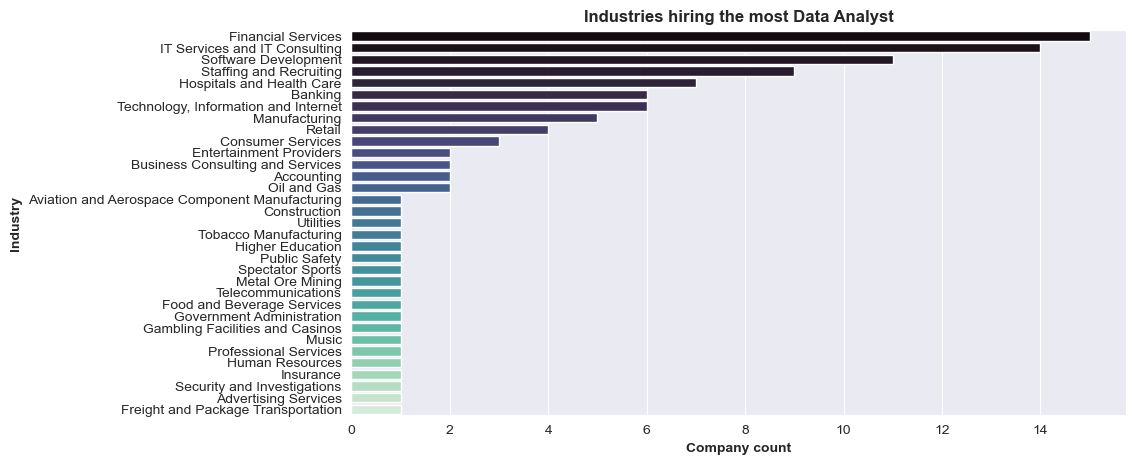

In [16]:
#Visualization
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.barplot(data= ind_df, x= 'count', y= 'Industry', palette= 'mako')

#Add title 
plt.title('Industries hiring the most Data Analyst', weight = 'bold')
plt.xlabel('Company count', weight = 'bold')
plt.ylabel('Industry', weight = 'bold')



>### 2. Work type and work environment

In [17]:
#Prepare data for Job type visualization 
type_df = df_original['Work Type'].value_counts(normalize=True).reset_index()
type_df

,Work Type,proportion
0,Full-time,0.724771
1,Contract,0.165138
2,Internship,0.073394
3,Temporary,0.036697


In [18]:
#Prepare data for work environment visualization 
env_df = df_original['Work Environment'].value_counts(normalize=True).reset_index()
env_df

,Work Environment,proportion
0,Hybrid,0.421569
1,On-site,0.372549
2,Remote,0.205882


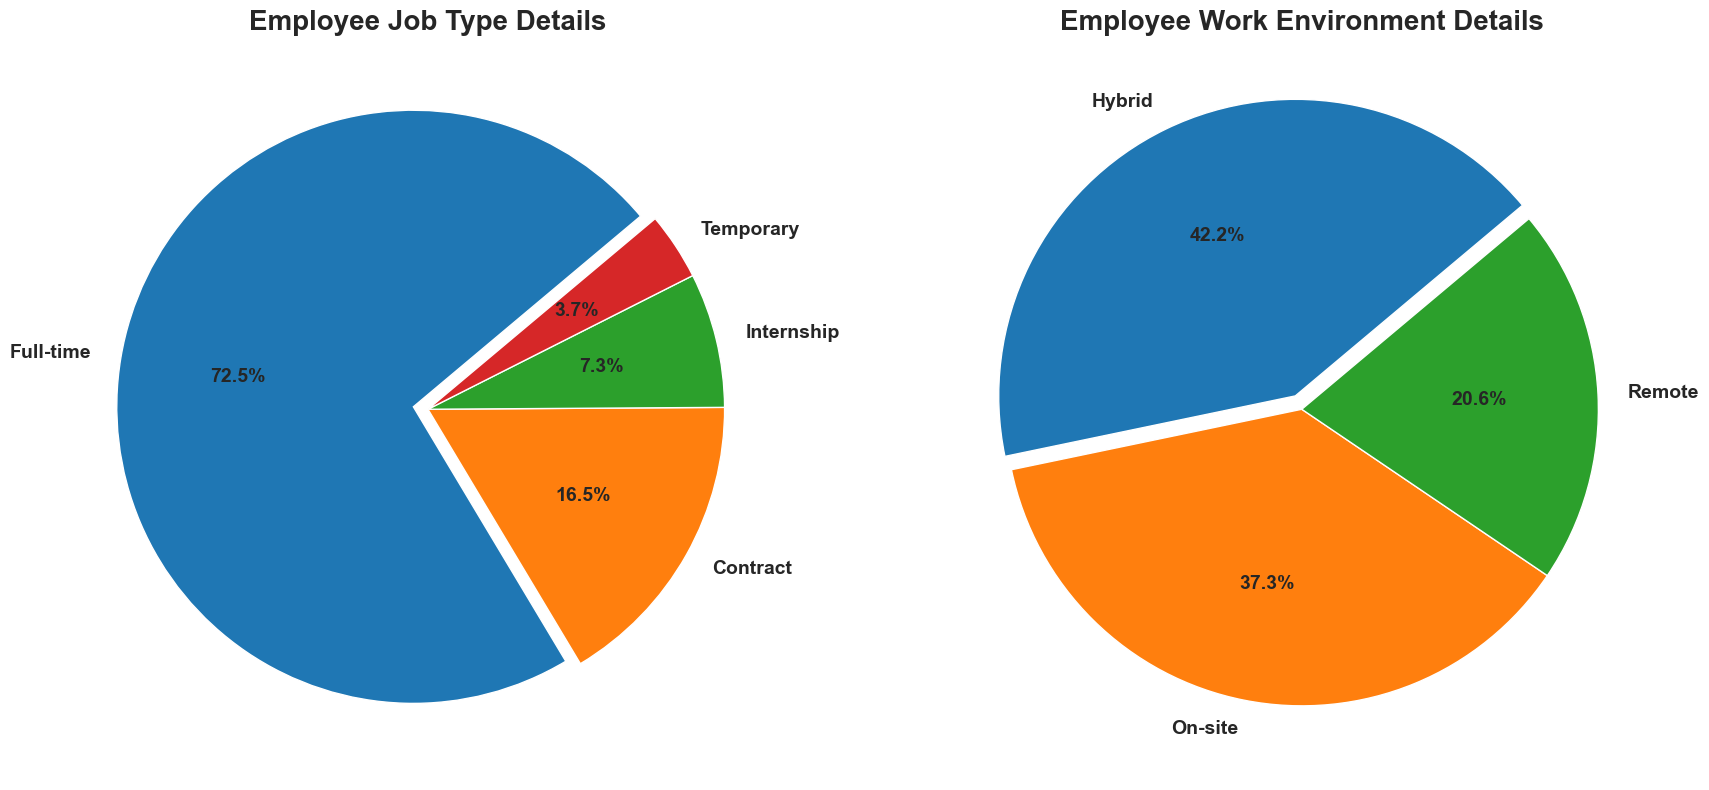

In [19]:
# Create a 1x2 grid for two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# First pie chart - Job Type Details
explode1 = (0.05, 0, 0, 0)
ax1.pie(type_df['proportion'], labels=type_df['Work Type'], autopct='%1.1f%%', 
        startangle=40, explode=explode1, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax1.set_title('Employee Job Type Details', weight='bold', fontsize=20)

# Second pie chart - Work Environment Details
explode2 = (0.05, 0, 0)
ax2.pie(env_df['proportion'], labels=env_df['Work Environment'], autopct='%1.1f%%', 
        startangle=40, explode=explode2, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax2.set_title('Employee Work Environment Details', weight='bold', fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the combined pie charts
plt.show()

> ### 3. Company size and education level requirement 

**Create a company type column based on the company size**

Small size: 11-50, 51-200\
Medium size: 201-500, 501-1000\
Large size:  1,001-5,000, 5,001-10,000, 10,001+

In [20]:
#See total for each company size
df_original['company size'].value_counts()

company size
10,001+ employees         28
1,001-5,000 employees     23
11-50 employees           13
201-500 employees         13
501-1,000 employees       12
51-200 employees          11
5,001-10,000 employees     9
Name: count, dtype: int64

In [21]:
#define a classifying function 
def company_classifier(x):
    if x in ['11-50 employees', '51-200 employees']:
     return ('Small')
    elif x in ['201-500 employees', '501-1,000 employees']:
     return ('Medium')
    else:
      return('large')
    
  #Apply the fucntion to the dataframe 
df_original['Company Type'] = df_original['company size'].apply(company_classifier)

In [22]:
#Fill 'Not required' for NaN in education level column 
df_original['Educational Level'] = df_original['Educational Level'].fillna('Not required')
df_original['Educational Level']. value_counts()

Educational Level
Undergraduate degree     50
Not required             39
Post-secondary degree    14
Master degree             7
Name: count, dtype: int64

In [23]:
#Prepare the data for visualization
company_type = df_original.groupby(['Company Type', 'Educational Level']).size()
company_type = pd.DataFrame(company_type)
company_type.columns = ['Count']
company_type = company_type.reset_index()
company_type

,Company Type,Educational Level,Count
0,Medium,Master degree,2
1,Medium,Not required,5
2,Medium,Post-secondary degree,6
3,Medium,Undergraduate degree,12
4,Small,Not required,11
5,Small,Post-secondary degree,1
6,Small,Undergraduate degree,12
7,large,Master degree,5
8,large,Not required,23
9,large,Post-secondary degree,7


Text(2.7, 11, 'Observations: Overall, large enterprises tend\nto hire more data analysts and usually\nrequire some post-secondary degrees.\nEducation degress are often not required\nin small companies than medium and large enterprises.')

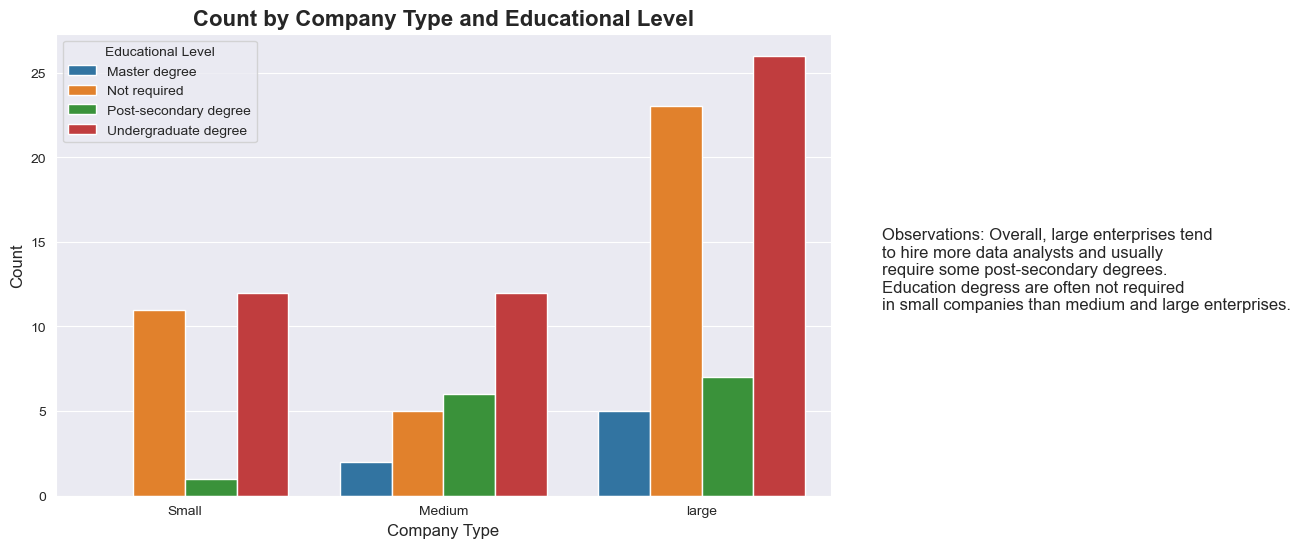

In [24]:
#Visualization 
# Set plot size
plt.figure(figsize=(10, 6))

# Create a barplot
order = ['Small', 'Medium', 'large']
sns.barplot(x='Company Type', y='Count', hue='Educational Level', data= company_type, order = order)

# Add title and labels
plt.title('Count by Company Type and Educational Level', fontsize=16, weight= 'bold')
plt.xlabel('Company Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add description text
plt.text(2.7, 11, 'Observations: Overall, large enterprises tend\nto hire more data analysts and usually\nrequire some post-secondary degrees.\nEducation degress are often not required\nin small companies than medium and large enterprises.', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

> ### 4. Base Salary expectation based on experience and education

**Ensure the experience requirement column is in proper numeric format**

In [25]:
#identify any rows with non numeric in the experience requirement column
def abc(x):
    return not str(x).isdigit()

df_original[df_original['Experience Requirements'].apply(abc)]

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry,Company Type
1,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",Not required,1-3 years,Analytical Skills · Dashboards · SQL · Analyti...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time,Financial Services,large
5,"CA$65,000/yr - CA$75,000/yr","Burnaby, BC","10,001+ employees",Not required,NaN,Microsoft Azure · Data Models · Data Warehousi...,"Security and Investigations 10,001+ employees ...",Hybrid,Full-time,Security and Investigations,large
9,NaN,"Compeer, AB","1,001-5,000 employees",Post-secondary degree,NaN,Data Management · Data Modeling · Data Enginee...,"Financial Services 1,001-5,000 employees 1,033...",On-site,Internship,Financial Services,large
15,"$62,000 - $92,000","Calgary, AB","10,001+ employees",Undergraduate degree,NaN,Analytical Skills · Communication · Computer S...,"Business Consulting and Services 10,001+ emplo...",Hybrid,Full-time,Business Consulting and Services,large
19,NaN,"Toronto, ON","10,001+ employees",Post-secondary degree,NaN,Analytics · Statistical Analysis · Visualizati...,"Banking 10,001+ employees 92,008 on LinkedIn",On-site,Internship,Banking,large
22,30-38 hr,"Vancouver, BC",51-200 employees,Not required,NaN,Python (Programming Language) · Reporting & An...,"Technology, Information and Internet 51-200 em...",On-site,Full-time,"Technology, Information and Internet",Small
23,NaN,"Toronto, ON","10,001+ employees",Undergraduate degree,NaN,Analytics · Data Quality · Business Case Devel...,"Banking 10,001+ employees 93,167 on LinkedIn",On-site,Internship,Banking,large
35,NaN,"Calgary, AB","10,001+ employees",Undergraduate degree,NaN,Communication · Critical Thinking · Problem So...,"Banking 10,001+ employees 91,418 on LinkedIn",Hybrid,Full-time,Banking,large
36,NaN,"Edmonton, AB",11-50 employees,Not required,NaN,Data Quality · Databases · Problem Solving · C...,Staffing and Recruiting 11-50 employees 22 on ...,Remote,Contract,Staffing and Recruiting,Small
37,NaN,"Vancouver, BC","501-1,000 employees",Undergraduate degree,NaN,Analytical Skills · Communication · Data Quali...,"Financial Services 501-1,000 employees 845 on ...",Hybrid,Full-time,Financial Services,Medium


In [26]:
#Replace 1-3 years with 2  
df_original['Experience Requirements'] = df_original['Experience Requirements'].replace('1-3 years', 2)
df_original[df_original['Experience Requirements'] == '1-3 years']

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry,Company Type


In [27]:
#Replace Nan with 0 
df_original['Experience Requirements'] = df_original['Experience Requirements'].fillna(0).astype(int)

In [28]:
#Change the column datatype into numeric 
df_original['Experience Requirements'] = df_original['Experience Requirements'].astype(int)
df_original.head(3)

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry,Company Type
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Problem Solving · R (Progr...,Hospitals and Health Care 11-50 employees 26 o...,Hybrid,Full-time,Hospitals and Health Care,Small
1,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",Not required,2,Analytical Skills · Dashboards · SQL · Analyti...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time,Financial Services,large
2,NaN,"Toronto, ON",11-50 employees,Not required,3,Analytical Skills · Problem Solving · Python (...,"Technology, Information and Internet 11-50 emp...",On-site,Full-time,"Technology, Information and Internet",Small


**Base salary versus experience level**

In [29]:
#Filter out nulls for base salaries column 
df_subset = df_original.dropna(subset= ['Base Salary'], axis= 0)

#Drop unecessary columns 
df_subset = df_subset.drop(['company size',  'Organization Type', 'Job Skills', 'Work Environment', 'Work Type' ], axis =1)
df_subset

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",Undergraduate degree,3,Hospitals and Health Care,Small
1,"$90,000 - $130,000","Victoria, BC",Not required,2,Financial Services,large
3,70-90,"Montreal, QC",Not required,2,Advertising Services,Small
5,"CA$65,000/yr - CA$75,000/yr","Burnaby, BC",Not required,0,Security and Investigations,large
6,55-75,"Toronto, ON",Not required,2,Staffing and Recruiting,large
10,100-150,"Vancouver, BC",Not required,6,Retail,large
12,"$107,600 - $147,100 CAN","Montreal, QC",Not required,4,Entertainment Providers,large
15,"$62,000 - $92,000","Calgary, AB",Undergraduate degree,0,Business Consulting and Services,large
17,45-55 hr,"Toronto, ON",Not required,5,Human Resources,Small
18,"$128,700 - C$174,100","Toronto, ON",Master degree,8,"Technology, Information and Internet",large


**Standardize data containing pay per hour, convert to annual salary**

In [30]:
#identify hourly pay
keywords = ['hr', 'HR', 'hour', 'Hr', 'hours']
df_subset[df_subset['Base Salary'].apply(lambda x: any(keyword in str(x) for keyword in keywords))]

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type
17,45-55 hr,"Toronto, ON",Not required,5,Human Resources,Small
22,30-38 hr,"Vancouver, BC",Not required,0,"Technology, Information and Internet",Small


In [31]:
#replace these hourly pay with their annual salary 
df_subset['Base Salary'] = df_subset['Base Salary'].replace({'45-55 hr': '$93,000-$114,000', '30-38 hr': '$62,000-$79,000'})

**To clean the Base Salary column**

My strategy is to remove any special characters and letters, and then split the data in to Min Salary and Max Salary columns

In [32]:
#Remove all letters
def remove_letters(s):
    # Remove all letters from the string, keeping only digits and special characters
    return re.sub(r'[a-zA-Z]', '', s)

df_subset['Base Salary_no_letters'] = df_subset['Base Salary'].apply(remove_letters)
df_subset


,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type,Base Salary_no_letters
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",Undergraduate degree,3,Hospitals and Health Care,Small,": 70,000  75,000"
1,"$90,000 - $130,000","Victoria, BC",Not required,2,Financial Services,large,"$90,000 - $130,000"
3,70-90,"Montreal, QC",Not required,2,Advertising Services,Small,70-90
5,"CA$65,000/yr - CA$75,000/yr","Burnaby, BC",Not required,0,Security and Investigations,large,"$65,000/ - $75,000/"
6,55-75,"Toronto, ON",Not required,2,Staffing and Recruiting,large,55-75
10,100-150,"Vancouver, BC",Not required,6,Retail,large,100-150
12,"$107,600 - $147,100 CAN","Montreal, QC",Not required,4,Entertainment Providers,large,"$107,600 - $147,100"
15,"$62,000 - $92,000","Calgary, AB",Undergraduate degree,0,Business Consulting and Services,large,"$62,000 - $92,000"
17,"$93,000-$114,000","Toronto, ON",Not required,5,Human Resources,Small,"$93,000-$114,000"
18,"$128,700 - C$174,100","Toronto, ON",Master degree,8,"Technology, Information and Internet",large,"$128,700 - $174,100"


In [33]:
#Remove all dollar sign 
def remove_dollar_sign(s):
    return s.replace('$', '')
df_subset['Base Salary_no_$'] = df_subset['Base Salary_no_letters'].apply(remove_dollar_sign)
df_subset

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type,Base Salary_no_letters,Base Salary_no_$
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",Undergraduate degree,3,Hospitals and Health Care,Small,": 70,000  75,000",": 70,000  75,000"
1,"$90,000 - $130,000","Victoria, BC",Not required,2,Financial Services,large,"$90,000 - $130,000","90,000 - 130,000"
3,70-90,"Montreal, QC",Not required,2,Advertising Services,Small,70-90,70-90
5,"CA$65,000/yr - CA$75,000/yr","Burnaby, BC",Not required,0,Security and Investigations,large,"$65,000/ - $75,000/","65,000/ - 75,000/"
6,55-75,"Toronto, ON",Not required,2,Staffing and Recruiting,large,55-75,55-75
10,100-150,"Vancouver, BC",Not required,6,Retail,large,100-150,100-150
12,"$107,600 - $147,100 CAN","Montreal, QC",Not required,4,Entertainment Providers,large,"$107,600 - $147,100","107,600 - 147,100"
15,"$62,000 - $92,000","Calgary, AB",Undergraduate degree,0,Business Consulting and Services,large,"$62,000 - $92,000","62,000 - 92,000"
17,"$93,000-$114,000","Toronto, ON",Not required,5,Human Resources,Small,"$93,000-$114,000","93,000-114,000"
18,"$128,700 - C$174,100","Toronto, ON",Master degree,8,"Technology, Information and Internet",large,"$128,700 - $174,100","128,700 - 174,100"


In [34]:
# Replace all special characters (non-alphanumeric) with a space
def replace_special_chars_with_space(s):
    return re.sub(r'[^\w\s]', ' ', s)
df_subset['Base Salary_no_special'] = df_subset['Base Salary_no_$'].apply(replace_special_chars_with_space)

df_subset

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type,Base Salary_no_letters,Base Salary_no_$,Base Salary_no_special
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",Undergraduate degree,3,Hospitals and Health Care,Small,": 70,000  75,000",": 70,000  75,000",70 000 75 000
1,"$90,000 - $130,000","Victoria, BC",Not required,2,Financial Services,large,"$90,000 - $130,000","90,000 - 130,000",90 000 130 000
3,70-90,"Montreal, QC",Not required,2,Advertising Services,Small,70-90,70-90,70 90
5,"CA$65,000/yr - CA$75,000/yr","Burnaby, BC",Not required,0,Security and Investigations,large,"$65,000/ - $75,000/","65,000/ - 75,000/",65 000 75 000
6,55-75,"Toronto, ON",Not required,2,Staffing and Recruiting,large,55-75,55-75,55 75
10,100-150,"Vancouver, BC",Not required,6,Retail,large,100-150,100-150,100 150
12,"$107,600 - $147,100 CAN","Montreal, QC",Not required,4,Entertainment Providers,large,"$107,600 - $147,100","107,600 - 147,100",107 600 147 100
15,"$62,000 - $92,000","Calgary, AB",Undergraduate degree,0,Business Consulting and Services,large,"$62,000 - $92,000","62,000 - 92,000",62 000 92 000
17,"$93,000-$114,000","Toronto, ON",Not required,5,Human Resources,Small,"$93,000-$114,000","93,000-114,000",93 000 114 000
18,"$128,700 - C$174,100","Toronto, ON",Master degree,8,"Technology, Information and Internet",large,"$128,700 - $174,100","128,700 - 174,100",128 700 174 100


In [35]:
# Remove non-numeric characters except spaces and split the string to min and max salary range 
def split_salary_range(s):

    cleaned = re.sub(r'[^\d\s]', '', s).strip() #Remove any character that is not a digit or a whitespace
    parts = re.split(r'\s+', cleaned)  # Split by any whitespace for example 70 000 - 75 000 would be ['70', '000', '75', '000']
    
    # Return min and max values based on the number of parts
    '''
    The logic behind this fucntion is if the list parts contain like ['70', '90'] then it will put them as 70 for min and 90 for max'.
    If our list parts contain ['70', '000', '75', '000'] then it will put as 70000 for min and 75000 for max

    '''
    if len(parts) == 2:
        return int(parts[0]), int(parts[1])
    elif len(parts) == 4:
        return int(parts[0] + parts[1]), int(parts[2] + parts[3])
    elif len(parts) == 6:
        return int(parts[0] + parts[1]), int(parts[3] + parts[4])
    return None, None

# Apply the function and create new columns
df_subset[['Min Salary', 'Max Salary']] = df_subset['Base Salary_no_special'].apply(split_salary_range).apply(pd.Series)

df_subset


,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type,Base Salary_no_letters,Base Salary_no_$,Base Salary_no_special,Min Salary,Max Salary
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",Undergraduate degree,3,Hospitals and Health Care,Small,": 70,000  75,000",": 70,000  75,000",70 000 75 000,70000.0,75000.0
1,"$90,000 - $130,000","Victoria, BC",Not required,2,Financial Services,large,"$90,000 - $130,000","90,000 - 130,000",90 000 130 000,90000.0,130000.0
3,70-90,"Montreal, QC",Not required,2,Advertising Services,Small,70-90,70-90,70 90,70.0,90.0
5,"CA$65,000/yr - CA$75,000/yr","Burnaby, BC",Not required,0,Security and Investigations,large,"$65,000/ - $75,000/","65,000/ - 75,000/",65 000 75 000,65000.0,75000.0
6,55-75,"Toronto, ON",Not required,2,Staffing and Recruiting,large,55-75,55-75,55 75,55.0,75.0
10,100-150,"Vancouver, BC",Not required,6,Retail,large,100-150,100-150,100 150,100.0,150.0
12,"$107,600 - $147,100 CAN","Montreal, QC",Not required,4,Entertainment Providers,large,"$107,600 - $147,100","107,600 - 147,100",107 600 147 100,107600.0,147100.0
15,"$62,000 - $92,000","Calgary, AB",Undergraduate degree,0,Business Consulting and Services,large,"$62,000 - $92,000","62,000 - 92,000",62 000 92 000,62000.0,92000.0
17,"$93,000-$114,000","Toronto, ON",Not required,5,Human Resources,Small,"$93,000-$114,000","93,000-114,000",93 000 114 000,93000.0,114000.0
18,"$128,700 - C$174,100","Toronto, ON",Master degree,8,"Technology, Information and Internet",large,"$128,700 - $174,100","128,700 - 174,100",128 700 174 100,128700.0,174100.0


In [36]:
#identify any column with Nulls 
df_subset[df_subset['Min Salary'].isna()]

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type,Base Salary_no_letters,Base Salary_no_$,Base Salary_no_special,Min Salary,Max Salary
43,"Dr. Jeremy Friedman, Associate Paediatrician-i...","Toronto, ON",Undergraduate degree,7,Hospitals and Health Care,Small,". , --, &; --®",". , --, &; --®",,NaN,NaN


In [37]:
#Drop row 43
df_subset.drop(index = 43, inplace= True)

In [38]:
#Create a new column called median salary ((min +max)/2)
df_subset['Median Salary'] = (df_subset['Min Salary'] + df_subset['Max Salary'])/2

**Final touch**

Some salary is only 65, possible the data is 65k and since we have removed the k so i want to increase the zeros. 

In [39]:
#Define a function to increase 3 zeros 
def correct_salary_value(value):
    # If the value is less than 1000, assume it's missing the 'k' suffix
    if value < 1000:
        return value * 1000
    return value

df_subset['Median Salary'] = df_subset['Median Salary'].apply(correct_salary_value)
df_subset.head()

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type,Base Salary_no_letters,Base Salary_no_$,Base Salary_no_special,Min Salary,Max Salary,Median Salary
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",Undergraduate degree,3,Hospitals and Health Care,Small,": 70,000  75,000",": 70,000  75,000",70 000 75 000,70000.0,75000.0,72500.0
1,"$90,000 - $130,000","Victoria, BC",Not required,2,Financial Services,large,"$90,000 - $130,000","90,000 - 130,000",90 000 130 000,90000.0,130000.0,110000.0
3,70-90,"Montreal, QC",Not required,2,Advertising Services,Small,70-90,70-90,70 90,70.0,90.0,80000.0
5,"CA$65,000/yr - CA$75,000/yr","Burnaby, BC",Not required,0,Security and Investigations,large,"$65,000/ - $75,000/","65,000/ - 75,000/",65 000 75 000,65000.0,75000.0,70000.0
6,55-75,"Toronto, ON",Not required,2,Staffing and Recruiting,large,55-75,55-75,55 75,55.0,75.0,65000.0


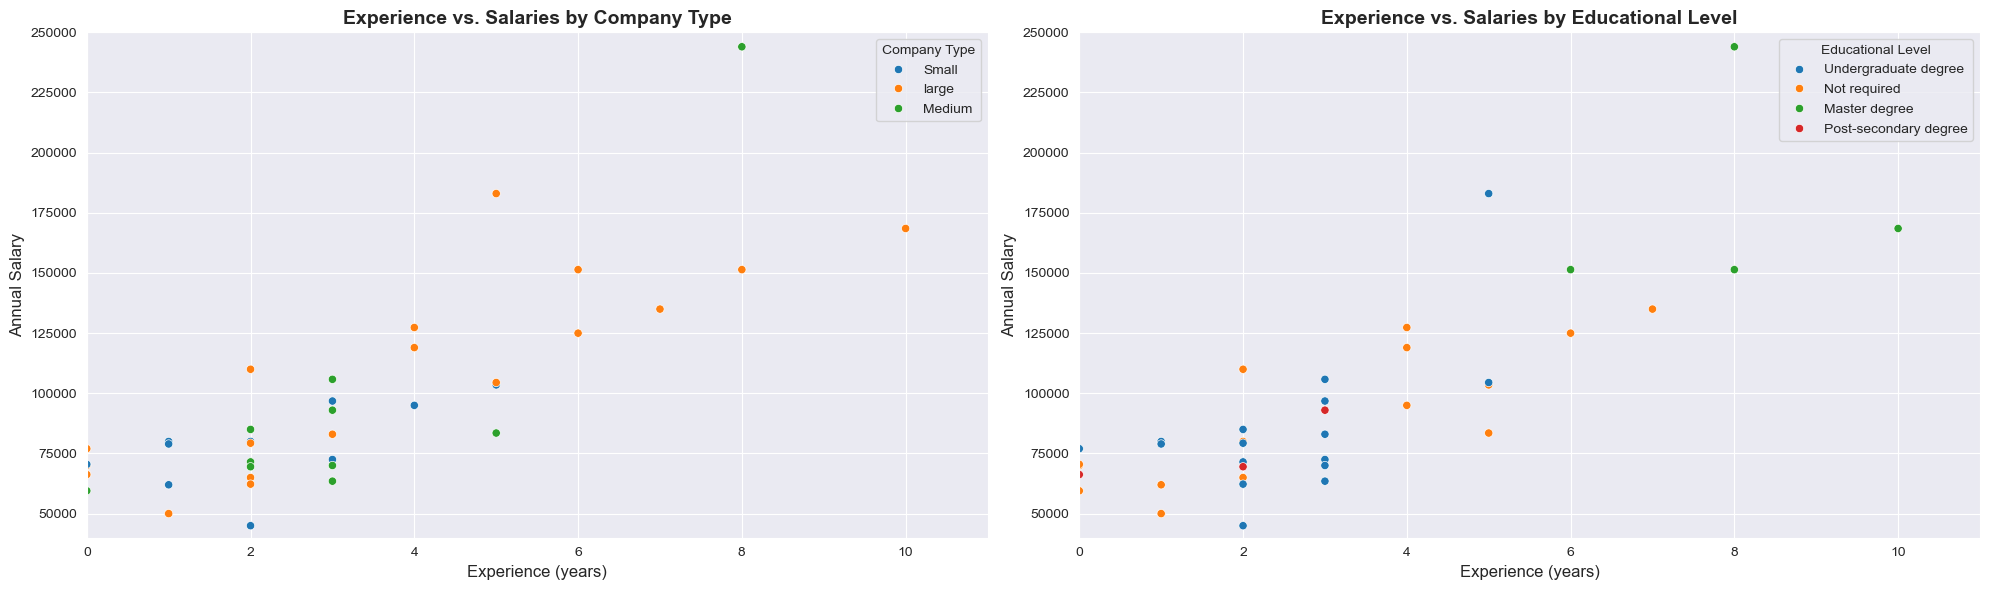

In [40]:
# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust the figsize to your preference

# First scatter plot: Salaries vs. Experience by Company Type
sns.scatterplot(data=df_subset, x='Experience Requirements', y='Median Salary', hue='Company Type', ax=axes[0])
axes[0].set_title('Experience vs. Salaries by Company Type', fontsize=14, weight='bold')
axes[0].set_xlabel('Experience (years)', fontsize=12)
axes[0].set_ylabel('Annual Salary', fontsize=12)

# Expand x and y axis intervals
axes[0].set_xlim(0, 11)  # Adjust the x-axis range as needed
axes[0].set_ylim(40000, 250000)  # Adjust the y-axis range as needed

# Second scatter plot: Salaries vs. Experience by Educational Level
sns.scatterplot(data=df_subset, x='Experience Requirements', y='Median Salary', hue='Educational Level', ax=axes[1])
axes[1].set_title('Experience vs. Salaries by Educational Level', fontsize=14, weight='bold')
axes[1].set_xlabel('Experience (years)', fontsize=12)
axes[1].set_ylabel('Annual Salary', fontsize=12)

# Expand x and y axis intervals for the second plot
axes[1].set_xlim(0, 11)  # Adjust the x-axis range as needed
axes[1].set_ylim(40000, 250000)  # Adjust the y-axis range as needed

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

> ### 5. What are the most common skills required for a data analyst

In [41]:
#View data, we will use the Job Skills column
df_original.head(2)

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry,Company Type
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Problem Solving · R (Progr...,Hospitals and Health Care 11-50 employees 26 o...,Hybrid,Full-time,Hospitals and Health Care,Small
1,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",Not required,2,Analytical Skills · Dashboards · SQL · Analyti...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time,Financial Services,large


In [42]:
#Split the skills column so each row will contain only one skill 
split = df_original['Job Skills'].str.split('·').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'Skills_split'
df_subset2 = df_original.join(split)
df_subset2.head(3)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23676\3486937077.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = df_original['Job Skills'].str.split('·').apply(Series, 1).stack()


,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry,Company Type,Skills_split
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Problem Solving · R (Progr...,Hospitals and Health Care 11-50 employees 26 o...,Hybrid,Full-time,Hospitals and Health Care,Small,Analytical Skills
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Problem Solving · R (Progr...,Hospitals and Health Care 11-50 employees 26 o...,Hybrid,Full-time,Hospitals and Health Care,Small,Problem Solving
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Problem Solving · R (Progr...,Hospitals and Health Care 11-50 employees 26 o...,Hybrid,Full-time,Hospitals and Health Care,Small,R (Programming Language)


In [43]:
#Change the unique skills to string type 
df_subset2['Skills_split'] = df_subset2['Skills_split'].astype(str)

#Check the unique skills 
bar = df_subset2['Skills_split'].value_counts().reset_index()
bar[bar['count'] > 5]

,Skills_split,count
0,SQL,87
1,Communication,49
2,Python,47
3,Analytics,41
4,Excel,41
5,Problem Solving,38
6,Tableau,29
7,Statistics,23
8,Power BI,20
9,Machine learning,17


There is a problem with this, there are many wrong formating among the skills causing misleading information\
so i will define a function to group the skills 

In [44]:
# Define a grouping function
def classify_skill(skill):
    # Check for null or missing values and return None or a placeholder
    if not skill or pd.isnull(skill):
        return None  
    
    # Convert to lowercase for consistency
    skill = skill.strip().lower()
    
    # Define the mapping of similar skills to a common label
    if 'excel' in skill or 'pivot tables' in skill or 'Excel Formulas' in skill or 'vba' in skill:
        return 'Excel'
    elif 'sqlserver' in skill or 'Microsoft SQL Server' in skill or 'sql server' in skill:
        return 'Microsoft SQL Server'
    elif 'sql' in skill or 'query' in skill:
        return 'SQL'
    elif 'python' in skill:
        return 'Python'
    elif 'communication' in skill:
        return 'Communication'
    elif 'analytical' in skill or 'problem solving' in skill or 'critical thinking' in skill or 'problems solving' in skill or 'analytics' in skill:
        return 'Analytical Thinking'
    elif 'tableau' in skill:
        return 'Tableau'
    elif 'power bi' in skill or 'powerbi' in skill:
        return 'Power BI'
    elif 'statistics' in skill or 'statistical' in skill:
        return 'Statistics'
    elif 'amazon' in skill or 'aws' in skill:
        return 'AWS'
    elif 'r programming' in skill or 'r (programming language)' in skill or 'R' in skill:
        return 'R'
    elif 'database' in skill:
        return 'Database'
    elif 'sas' in skill:
        return 'SAS'
    elif 'pipeline' in skill or 'pyspark' in skill or 'databricks' in skill or 'etl' in skill:
        return 'Data Pipeline'
    elif 'azure' in skill:
        return 'Azure'
    elif 'ad hoc' in skill or 'ad-hoc' in skill:
        return 'Ad Hoc Analysis'
    elif 'models' in skill or 'data modeling' in skill or 'modeling' in skill:
        return 'Data Modeling'
    elif 'ai' in skill or 'machine learning' in skill or 'predictive' in skill or 'sklearn' in skill or 'tensorflow' in skill:
        return 'AI and Machine Learning'
    elif 'Snowflake' in skill:
        return 'Snowflake'
    # If no match, return the original skill
    return skill.title()  # Return title case for consistency


In [45]:
#Apply the function 
df_subset2['Skills_grouped'] = df_subset2['Skills_split'].apply(classify_skill)

In [46]:
#Data for visualization
df_final = df_subset2['Skills_grouped'].value_counts().reset_index()
df_final = df_final[df_final['count'] > 5]
df_final

,Skills_grouped,count
0,Analytical Thinking,131
1,SQL,101
2,Python,68
3,Communication,64
4,Excel,55
5,Data Pipeline,42
6,Power BI,40
7,Statistics,34
8,Tableau,32
9,AI and Machine Learning,30


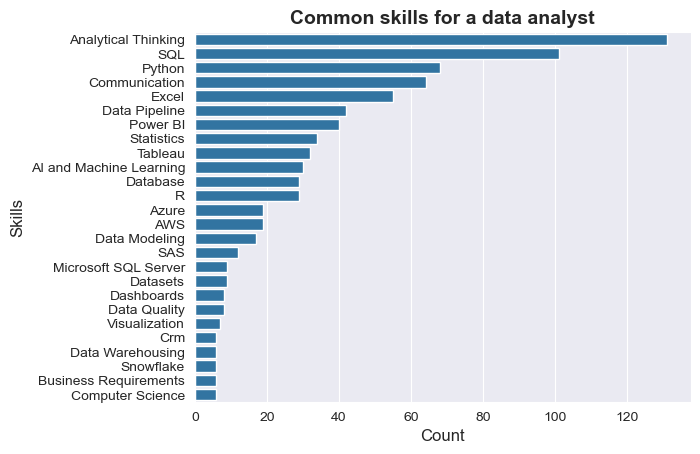

In [47]:
#Create a bar graph visualization 
sns.barplot(data= df_final, x='count', y='Skills_grouped')

# Add title and labels
plt.title('Common skills for a data analyst', fontsize=14, weight= 'bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Skills', fontsize=12)

plt.show()

> ### 6. Top location hiring for data analyst

In [48]:
#Return to our original dataset 
df_original.head()

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry,Company Type
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Problem Solving · R (Progr...,Hospitals and Health Care 11-50 employees 26 o...,Hybrid,Full-time,Hospitals and Health Care,Small
1,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",Not required,2,Analytical Skills · Dashboards · SQL · Analyti...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time,Financial Services,large
2,NaN,"Toronto, ON",11-50 employees,Not required,3,Analytical Skills · Problem Solving · Python (...,"Technology, Information and Internet 11-50 emp...",On-site,Full-time,"Technology, Information and Internet",Small
3,70-90,"Montreal, QC",11-50 employees,Not required,2,Problem Solving · Python (Programming Language...,Advertising Services 11-50 employees 64 on Lin...,Hybrid,Full-time,Advertising Services,Small
4,NaN,"Toronto, ON","1,001-5,000 employees",Not required,6,Excel · Python (Programming Language) · SQL · ...,"IT Services and IT Consulting 1,001-5,000 empl...",Hybrid,Contract,IT Services and IT Consulting,large


In [49]:
#Isolate the location column 
df_locations = df_original['Company Location'].reset_index()
#Separate the provinces in another columns  
# Split by comma, take the last part, and strip whitespace
df_locations['Province'] = df_locations['Company Location'].str.split(',').str[1].str.strip()
df_locations

,index,Company Location,Province
0,0,"Vancouver, BC",BC
1,1,"Victoria, BC",BC
2,2,"Toronto, ON",ON
3,3,"Montreal, QC",QC
4,4,"Toronto, ON",ON
...,...,...,...
105,105,"Vancouver, BC",BC
106,106,"Vancouver, BC",BC
107,107,"Parksville, BC",BC
108,108,"Calgary, AB",AB


In [50]:
df_locations = df_locations['Province'].value_counts(normalize= True).reset_index()
df_locations

,Province,proportion
0,ON,0.448598
1,BC,0.289720
2,AB,0.112150
3,QC,0.102804
4,SK,0.028037
5,NS,0.009346
6,NB,0.009346


<Figure size 1000x600 with 0 Axes>

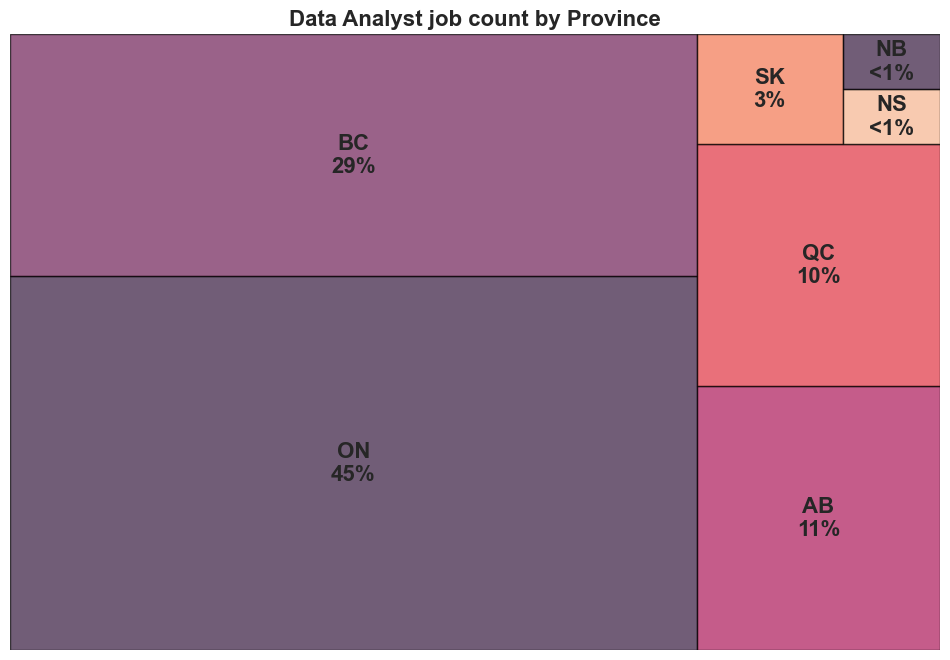

In [51]:
# Data visualization
import squarify

plt.figure(figsize=(10, 6))
color = sns.color_palette("rocket")

#Specify labels 
labels = ['ON\n45%', 'BC\n29%', 'AB\n11%', 'QC\n10%', 'SK\n3%', 'NS\n<1%', 'NB\n<1%']

# Plot
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes= df_locations['proportion'],
    label= labels ,
    color = color,
    alpha=0.7, 
    text_kwargs={'fontsize': 16, 'weight': 'bold'}, 
    ec = 'black')

# Title
plt.title('Data Analyst job count by Province', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()